In [3]:
import pandas as pd
df = pd.read_csv("Loan_Data.csv")

In [5]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [9]:
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour un joli style
sns.set(style="whitegrid")

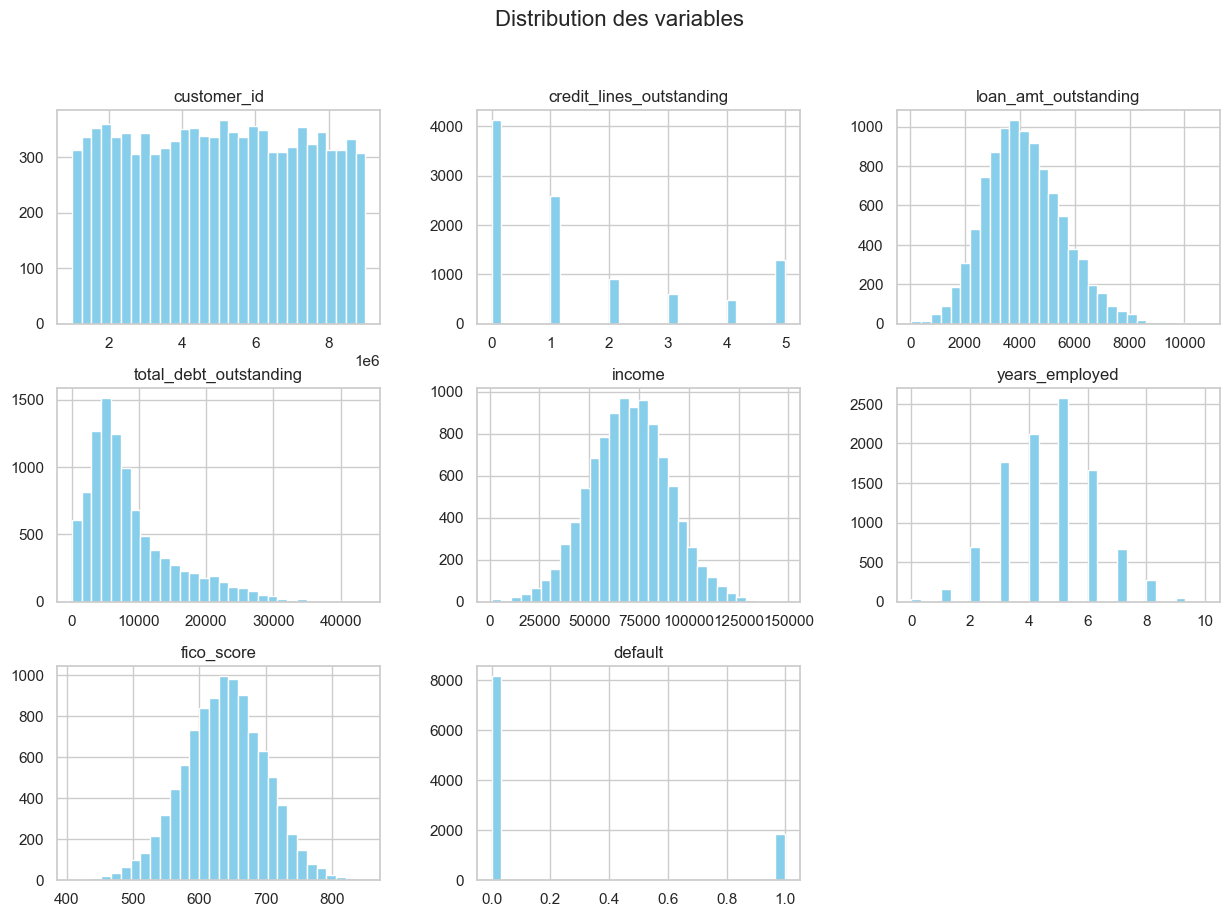

In [13]:
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution des variables", fontsize=16)
plt.show()

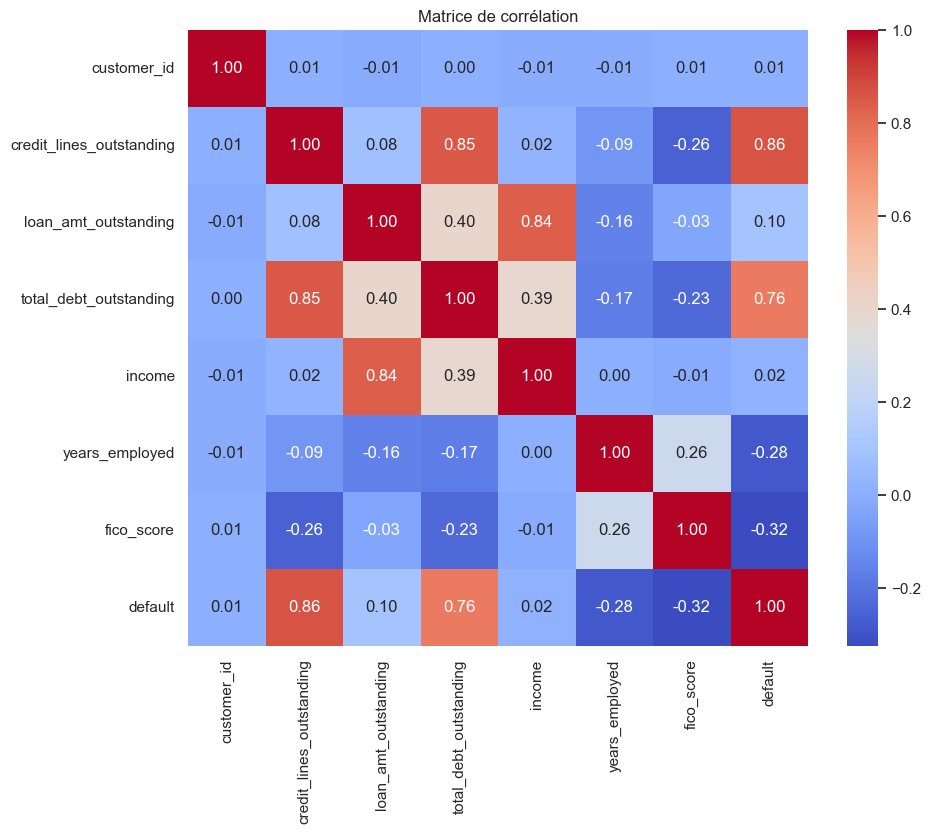

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

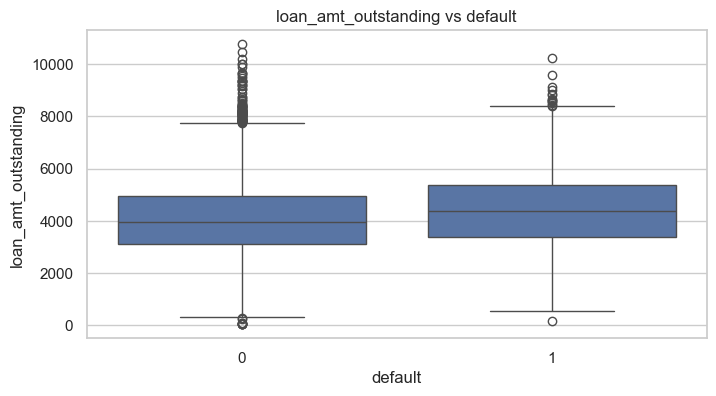

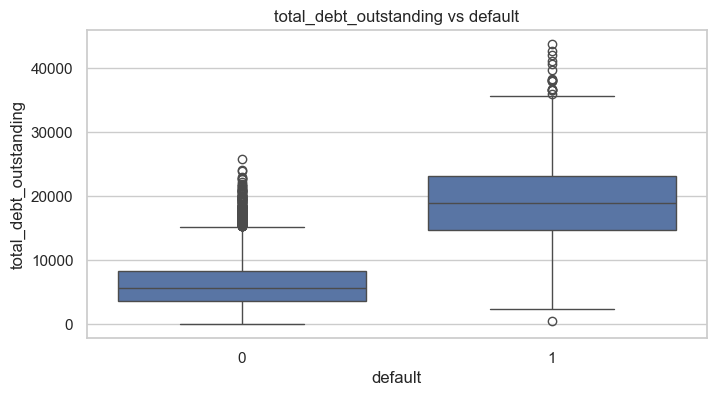

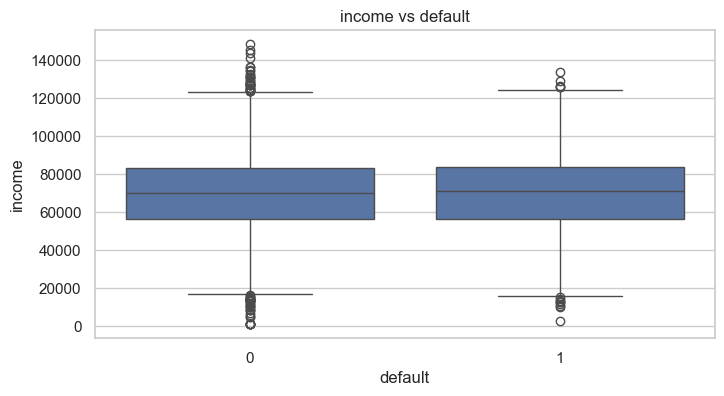

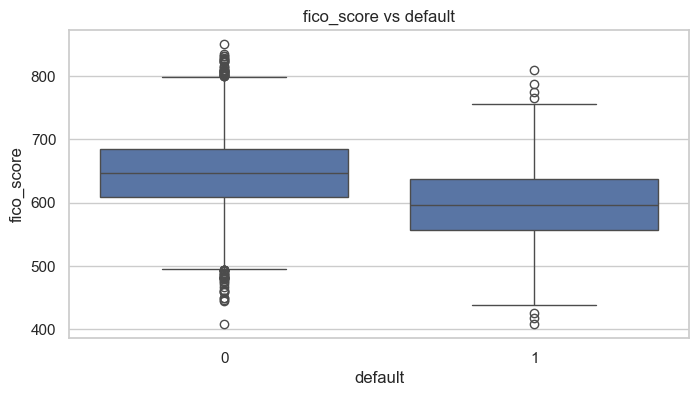

In [17]:
cols = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f"{col} vs default")
    plt.show()

In [19]:
# Supprimer customer_id car il n'apporte aucune info pour la prédiction
df = df.drop(columns=['customer_id'])

In [21]:
# Séparation des variables explicatives et de la cible
X = df.drop('default', axis=1)
y = df['default']

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Juste pour avoir des titres plus propres dans les prints
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [29]:
# Régression Logistique
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

evaluate_model(y_test, y_pred_lr, "Régression Logistique")


--- Régression Logistique ---
[[1630    0]
 [   2  368]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      0.99      1.00       370

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [33]:
# Entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Random Forest ---
[[1628    2]
 [   5  365]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [35]:
print("ROC AUC - Logistic Regression :", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
print("ROC AUC - Random Forest       :", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

ROC AUC - Logistic Regression : 0.9999883933012768
ROC AUC - Random Forest       : 0.9998632067650473


In [37]:
import mlflow
import mlflow.sklearn

# Démarrer un experiment (nom affiché dans l’interface MLflow)
mlflow.set_experiment("credit_default_prediction")

# === Régression Logistique ===
with mlflow.start_run(run_name="LogisticRegression"):
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    
    # Log du modèle et des métriques
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
    
    mlflow.sklearn.log_model(lr_model, "logistic_model")

# === Random Forest ===
with mlflow.start_run(run_name="RandomForest"):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    
    mlflow.log_param("model", "RandomForest")
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
    
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

2025/03/22 12:45:29 INFO mlflow.tracking.fluent: Experiment with name 'credit_default_prediction' does not exist. Creating a new experiment.
2025/03/22 12:45:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/22 12:45:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [39]:
with mlflow.start_run(run_name="RandomForest"):
    ...

In [45]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

mlflow.set_experiment("credit_default_prediction")

with mlflow.start_run(run_name="RandomForest"):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Log des paramètres et de la métrique
    mlflow.log_param("model", "RandomForest")
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

    # Exemple d'entrée (important pour éviter les erreurs avec Streamlit)
    input_example = X_test.iloc[:1]
    
    # Log du modèle
    mlflow.sklearn.log_model(
        rf_model,
        "random_forest_model",
        input_example=input_example
    )

    print("✅ Modèle Random Forest loggué avec succès.")

C:\Users\TORO ILIACE\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\TORO ILIACE\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\TORO ILIACE\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\TORO ILIACE\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that incl

✅ Modèle Random Forest loggué avec succès.


C:\Users\TORO ILIACE\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
